# Example of how to use the capacity code

This notebook demonstrates how to use the capacity tool with standard settings.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy.linalg as alg
from sklearn.decomposition import PCA

import esn as ESN
import capacities as CAP

ESN.test_loading()
CAP.test_loading()


%matplotlib notebook
%matplotlib inline

# Helper function to use the capacities data structure coming out of the iterator
# cap2vec collates all capacities with same maximal delay and degree up to given maximal values
def cap2vec(capacities,maxdel=1000,maxdeg=10):
    vec = np.zeros((maxdel,maxdeg))
    for idx in range(len(capacities)):
        delay=capacities[idx]['delay']
        degree=capacities[idx]['degree']
        if (delay<=maxdel) and (degree<=maxdeg):
            vec[delay-1,degree-1]+=capacities[idx]['score']
    return vec
    

ESN library loaded
Capacity library loaded


In [25]:
# test with ESN (see ESN code for details) - in this case a small one with only 20 nodes
# Note: if you want to get to 'full capacity', steps must be set to very high values
# Also, the sum sometimes overshoots in non-linear systems 
# due to accumulated numerical errors (huge number of very small capacities)
# because the statistical threshold is not an exact bound


# Set reservoir params: nodes, input scaling, bias scaling, spectral radius
nodes = 100
IS = 0.001
BS = 0.0
specrad = 0.95

# Number of time steps: you can use 1e5 for quick-and-dirty, but I used 1e6 in the paper
steps = 1000000
warmup_drop = 500
samples = steps + warmup_drop

# Important: capacity theory with Legendre polynomials assumes uniform random inputs in [-1,1]
inputs = 2.0*np.random.rand(samples,1)-1.0

# in this example: use uniformly distributed, fully connected weight matrices
I2R = ESN.CM_Initialise_Normal(1,nodes,scale = IS)
B2R = ESN.CM_Initialise_Normal(1,nodes,scale = BS)
R2R = ESN.CM_Initialise_Normal(nodes,nodes,scale = 1.0)
R2R = ESN.CM_scale_specrad(R2R,specrad)

# Initialise and run reservoir on inputs
Res = ESN.ESN(I2R = I2R, B2R = B2R, R2R = R2R)#, nonlinearity = ESN.Lin)
states = Res.Batch(inputs)

# Measure capacities on inputs and states after removing a "warmup period"
# If you require more extensive printed output of individual capacities:
# set verbose = 1
Citer=CAP.capacity_iterator()#, verbose = 1)
totalcap,allcaps,numcaps,nodes = Citer.collect(inputs[warmup_drop:,:],states[warmup_drop:,:])

print("\nMeasured ",numcaps," capacities above threshold.\nTotal capacity = ",totalcap)


Estimated rank of state covariance matrix =  48
Total score for degree  1  =  47.996608805916175 (cumulative total =  47.996608805916175 )
Total score for degree  2  =  0.0 (cumulative total =  47.996608805916175 )
Total score for degree  3  =  0.0 (cumulative total =  47.996608805916175 )
Total capacity=47.997 (48.00 percent)

Measured  124  capacities above threshold.
Total capacity =  47.996608805916175


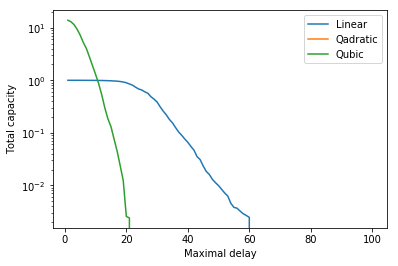

In [21]:
maxdel = 100
maxdeg = 6
V = cap2vec(allcaps,maxdel = maxdel, maxdeg = maxdeg)

delrange = np.arange(1,maxdel+1)
totcap = np.sum(V,axis=1)
plt.figure()
plt.semilogy(delrange,V[:,0],label='Linear')
plt.plot(delrange,V[:,1],label='Qadratic')
plt.plot(delrange,V[:,2],label='Qubic')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()

In [14]:
# Set reservoir params: nodes, input scaling, bias scaling, spectral radius
nodes1 = 100
IS1 = 0.000001
BS1 = 0.0
specrad1 = 0.9999

# Number of time steps: you can use 1e5 for quick-and-dirty, but I used 1e6 in the paper
steps1 = 1000000
warmup_drop1 = 20*nodes1
samples1 = steps1 + warmup_drop1

# Important: capacity theory with Legendre polynomials assumes uniform random inputs in [-1,1]
inputs1 = 2.0*np.random.rand(samples1,1)-1.0

# in this example: use uniformly distributed, fully connected weight matrices
I2R1 = ESN.CM_Initialise_Normal(1,nodes1,scale = IS1)
B2R1 = ESN.CM_Initialise_Normal(1,nodes1,scale = BS1)
R2R1 = ESN.CM_Initialise_Orthogonal(nodes1,nodes1)
R2R1 = ESN.CM_scale_specrad(R2R1,specrad1)

# Initialise and run reservoir on inputs
Res1 = ESN.ESN(I2R = I2R1, B2R = B2R1, R2R = R2R1, nonlinearity = ESN.Lin)
states1 = Res1.Batch(inputs1)

Citer1=CAP.capacity_iterator()#, verbose = 1)
rstates1 = states1[warmup_drop1:,:]
totalcap1,allcaps1,numcaps1,nodes1 = Citer1.collect(inputs1[warmup_drop1:,:],rstates1)
print("\nMeasured ",numcaps1," capacities above threshold.\nTotal capacity = ",totalcap1)

Estimated rank of state covariance matrix =  100
Total score for degree  1  =  97.44486040834413 (cumulative total =  97.44486040834413 )
Total score for degree  2  =  0.0 (cumulative total =  97.44486040834413 )
Total score for degree  3  =  0.0 (cumulative total =  97.44486040834413 )
Total capacity=97.445 (97.44 percent)

Measured  24020  capacities above threshold.
Total capacity =  97.44486040834413


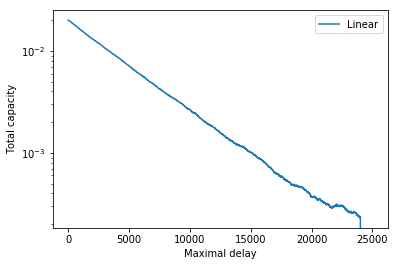

In [19]:
maxdel1 = 25000
maxdeg1 = 6
delrange1 = np.arange(1,maxdel1+1)
plt.figure()
V1 = cap2vec(allcaps1,maxdel = maxdel1, maxdeg = maxdeg1)
totcap1 = np.sum(V1,axis=1)
plt.semilogy(delrange1,V1[:,0],label='Linear')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()

In [16]:
# Set reservoir params: nodes, input scaling, bias scaling, spectral radius
nodes2 = 100
IS2 = 0.000001
BS2 = 0.0
specrad2 = 0.9999

# Number of time steps: you can use 1e5 for quick-and-dirty, but I used 1e6 in the paper
steps2 = 1000000
warmup_drop2 = 20*nodes2
samples2 = steps2 + warmup_drop2

# Important: capacity theory with Legendre polynomials assumes uniform random inputs in [-1,1]
inputs2 = 2.0*np.random.rand(samples2,1)-1.0

# in this example: use uniformly distributed, fully connected weight matrices
I2R2 = ESN.CM_Initialise_Normal(1,nodes2,scale = IS2)
B2R2 = ESN.CM_Initialise_Normal(1,nodes2,scale = BS2)
R2R2 = ESN.CM_Initialise_Orthogonal(nodes2,nodes2)
R2R2 = ESN.CM_scale_specrad(R2R2,specrad2)

# Initialise and run reservoir on inputs
Res2 = ESN.ESN(I2R = I2R2, B2R = B2R2, R2R = R2R2)
states2 = Res2.Batch(inputs2)

Citer2=CAP.capacity_iterator()#, verbose = 1)
rstates2 = states2[warmup_drop2:,:]
totalcap2,allcaps2,numcaps2,nodes2 = Citer.collect(inputs2[warmup_drop2:,:],rstates2)
print("\nMeasured ",numcaps2," capacities above threshold.\nTotal capacity = ",totalcap2)

Estimated rank of state covariance matrix =  100
Total score for degree  1  =  103.14082936068945 (cumulative total =  103.14082936068945 )
Total score for degree  2  =  0.0 (cumulative total =  103.14082936068945 )
Total score for degree  3  =  0.0 (cumulative total =  103.14082936068945 )
Total capacity=103.141 (103.14 percent)

Measured  23761  capacities above threshold.
Total capacity =  103.14082936068945


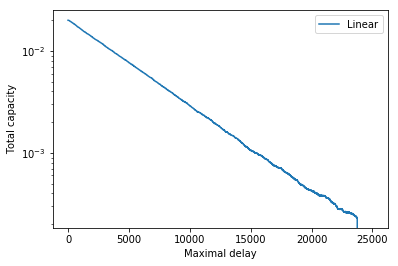

In [18]:
maxdel2 = 25000
maxdeg2 = 6
delrange2 = np.arange(1,maxdel2+1)
plt.figure()
V2 = cap2vec(allcaps2,maxdel = maxdel2, maxdeg = maxdeg2)
totcap2 = np.sum(V2,axis=1)
plt.semilogy(delrange2,V2[:,0],label='Linear')

plt.xlabel('Maximal delay')
plt.ylabel('Total capacity')
plt.legend()
plt.show()